# Homework 7

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['font.size'] = 8
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['lines.linewidth'] = 1

## Exercise 1

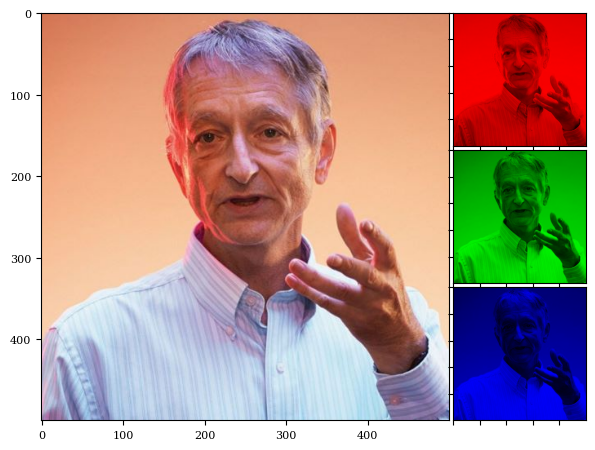

In [2]:
# load image
img = plt.imread('figs/Hinton.jpg')
R, G, B = img[:, :, 0] / 255, img[:, :, 1] / 255, img[:, :, 2] / 255

# plot image with RGB channels
from mpl_toolkits.axes_grid1.axes_rgb import make_rgb_axes

fig, ax = plt.subplots(figsize=(6, 6))
ax_R, ax_G, ax_B = make_rgb_axes(ax)

R_img = np.zeros_like(img, dtype=float)
G_img = np.zeros_like(img, dtype=float)
B_img = np.zeros_like(img, dtype=float)
R_img[:, :, 0] = R
G_img[:, :, 1] = G
B_img[:, :, 2] = B

ax.imshow(img)
ax_R.imshow(R_img)
ax_G.imshow(G_img)
ax_B.imshow(B_img)

fig.tight_layout()
fig.savefig('figs/hinton_rgb.pdf')

In [3]:
# compute svd
UR, sR, VTR = np.linalg.svd(R)
UG, sG, VTG = np.linalg.svd(G)
UB, sB, VTB = np.linalg.svd(B)
UR.shape, sR.shape, VTR.shape

((500, 500), (500,), (500, 500))

In [4]:
# sort singular values
idxR = np.argsort(sR)[::-1]
UR = UR[:, idxR]
sR = sR[idxR]
VTR = VTR[idxR, :]

idxG = np.argsort(sG)[::-1]
UG = UG[:, idxG]
sG = sG[idxG]
VTG = VTG[idxG, :]

idxB = np.argsort(sB)[::-1]
UB = UB[:, idxB]
sB = sB[idxB]
VTB = VTB[idxB, :]

UR.shape, sR.shape, VTR.shape

((500, 500), (500,), (500, 500))

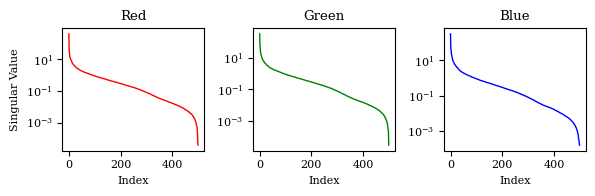

In [5]:
# plot singular values
fig, ax = plt.subplots(1, 3, figsize=(6, 2))

ax[0].semilogy(sR, color='r')
ax[0].set_title('Red')
ax[0].set_xlabel('Index')
ax[0].set_ylabel('Singular Value')

ax[1].semilogy(sG, color='g')
ax[1].set_title('Green')
ax[1].set_xlabel('Index')
ax[0].set_ylabel('Singular Value')

ax[2].semilogy(sB, color='b')
ax[2].set_title('Blue')
ax[2].set_xlabel('Index')
ax[0].set_ylabel('Singular Value')

fig.tight_layout()
fig.savefig('figs/singular-values.pdf')

k = 2, err = 186.01
k = 4, err = 128.13
k = 8, err = 93.48
k = 16, err = 66.92
k = 32, err = 44.82
k = 64, err = 27.70
k = 128, err = 12.98
k = 256, err = 2.69


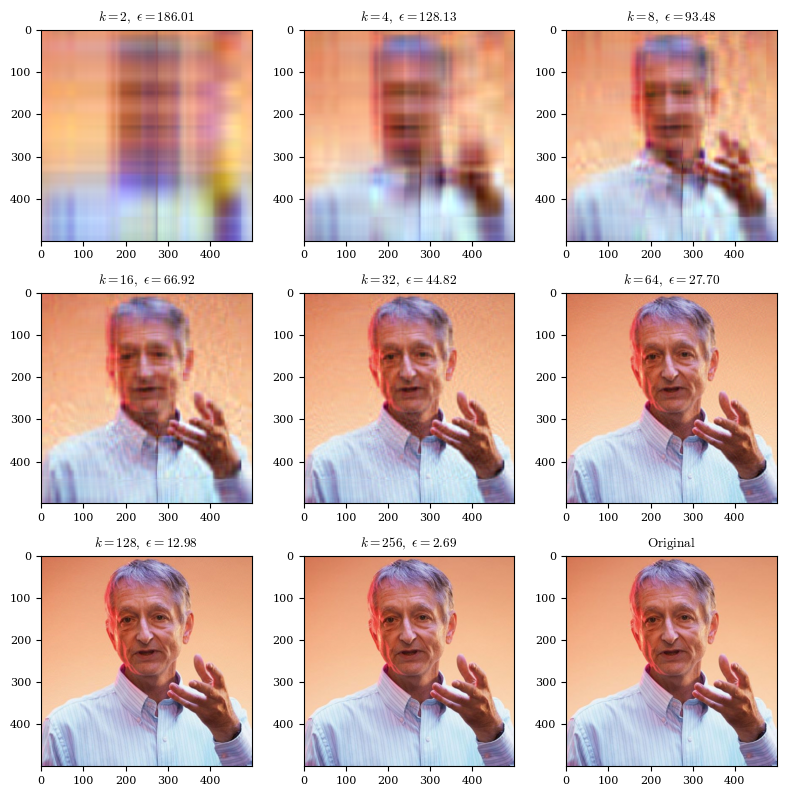

In [6]:
# plot compressed images
k_list = np.exp2(np.arange(1, 9))

fig, ax = plt.subplots(3, 3, figsize=(8, 8))

for i, k in enumerate(k_list):
    k = int(k)
    # compute truncated svd
    Rk = (UR[:, :k] @ np.diag(sR[:k]) @ VTR[:k, :]).clip(0, 1)
    Gk = (UG[:, :k] @ np.diag(sG[:k]) @ VTG[:k, :]).clip(0, 1)
    Bk = (UB[:, :k] @ np.diag(sB[:k]) @ VTB[:k, :]).clip(0, 1)
    # compute truncation error (sum of frobeniues norm)
    err = np.linalg.norm(R - Rk, ord='fro') + np.linalg.norm(
        G - Gk, ord='fro') + np.linalg.norm(B - Bk, ord='fro')
    # plot
    imgk = np.dstack((Rk, Gk, Bk))
    ax[i // 3, i % 3].imshow(imgk)
    ax[i // 3, i % 3].set_title(f'$k = {k},\ \\epsilon = {err:.2f}$')
    print(f'k = {k}, err = {err:.2f}')

ax[2, 2].imshow(img)
ax[2, 2].set_title(r'$\rm Original$')
fig.tight_layout()
fig.savefig('figs/compressed.pdf')

## Exercise 2

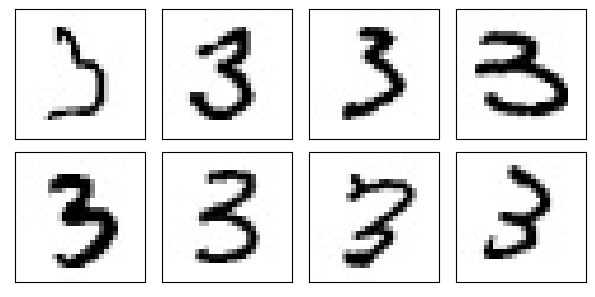

In [7]:
# load all the images under img_3
import os

img_list = []
for file in os.listdir('imgs_3'):
    img_list.append(plt.imread(os.path.join('imgs_3', file)) / 255)

# plot sample images
idx = np.random.choice(len(img_list), 8, replace=False)
fig, ax = plt.subplots(2, 4, figsize=(6, 3))
for i, j in enumerate(idx):
    ax[i // 4, i % 4].imshow(img_list[j], cmap='gray_r', vmin=0, vmax=1)
    ax[i // 4, i % 4].set_xticks([])
    ax[i // 4, i % 4].set_yticks([])
fig.tight_layout()
fig.savefig('figs/sample-3.pdf')

In [8]:
# Create centered design matrix
X = np.array([img.flatten() for img in img_list])
barx = X.mean(axis=0)
X = X - barx
X.shape, X.max(), X.min()

((130, 784), 0.9904977375565611, -0.7673303167420814)

In [9]:
# compute svd
U, s, VT = np.linalg.svd(X)

# sort singular values
idx = np.argsort(s)[::-1]
U = U[:, idx]
s = s[idx]
VT = VT[idx, :]

U.shape, s.shape, VT.shape

((130, 130), (130,), (130, 784))

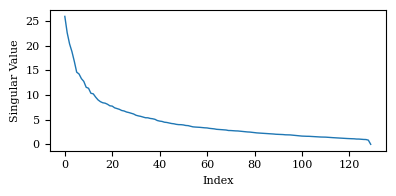

In [10]:

# plot singular values
fig, ax = plt.subplots(figsize=(4, 2))
ax.plot(s)
ax.set_xlabel('Index')
ax.set_ylabel('Singular Value')
fig.tight_layout()
fig.savefig('figs/svd-3.pdf')

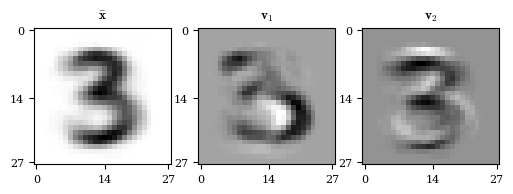

In [11]:
# plot x.mean and first 2 principal components
fig, ax = plt.subplots(1, 3, figsize=(6, 2))

ax[0].imshow(barx.reshape(28, 28), cmap='gray_r')
ax[0].set_title(r'$\bar{\mathbf{x}}$')
ax[0].set_xticks([0, 14, 27])
ax[0].set_yticks([0, 14, 27])

ax[1].imshow(VT[0, :].reshape(28, 28), cmap='gray_r')
ax[1].set_title(r'$\mathbf{v}_1$')
ax[1].set_xticks([0, 14, 27])
ax[1].set_yticks([0, 14, 27])

ax[2].imshow(VT[1, :].reshape(28, 28), cmap='gray_r')
ax[2].set_title(r'$\mathbf{v}_2$')
ax[2].set_xticks([0, 14, 27])
ax[2].set_yticks([0, 14, 27])

# fig.tight_layout()
fig.savefig('figs/mean-pc.pdf')

## Exercise 4

In [1]:
from sympy import *

P0 = ones(1, 11) / 11
M = sympify('''Matrix([[0.25, 0.7, 0, 0.05, 0, 0, 0, 0, 0, 0, 0],
            [0.05, 0.8, 0.15, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0.05, 0.25, 0, 0.7, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0.3, 0, 0.7, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0.3, 0, 0, 0.7, 0, 0, 0],
            [0, 0, 0, 0.15, 0, 0.1, 0.7, 0, 0.05, 0, 0],
            [0, 0, 0, 0, 0, 0, 0.25, 0.7, 0, 0.05, 0],
            [0, 0, 0, 0, 0, 0, 0.05, 0.25, 0, 0, 0.7],
            [0, 0, 0, 0, 0, 0.7, 0, 0, 0.25, 0.05, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])''',
            rational=true)

P1 = P0 @ M
P2 = P1 @ M

display(M, P1, P2)

Matrix([
[ 1/4, 7/10,    0, 1/20,    0,    0,    0,    0,    0,    0,    0],
[1/20,  4/5, 3/20,    0,    0,    0,    0,    0,    0,    0,    0],
[   0, 1/20,  1/4,    0, 7/10,    0,    0,    0,    0,    0,    0],
[   0,    0,    0, 3/10,    0, 7/10,    0,    0,    0,    0,    0],
[   0,    0,    0,    0, 3/10,    0,    0, 7/10,    0,    0,    0],
[   0,    0,    0, 3/20,    0, 1/10, 7/10,    0, 1/20,    0,    0],
[   0,    0,    0,    0,    0,    0,  1/4, 7/10,    0, 1/20,    0],
[   0,    0,    0,    0,    0,    0, 1/20,  1/4,    0,    0, 7/10],
[   0,    0,    0,    0,    0, 7/10,    0,    0,  1/4, 1/20,    0],
[   0,    0,    0,    0,    0,    0,    0,    0,    0,    1,    0],
[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    1]])

Matrix([[3/110, 31/220, 2/55, 1/22, 1/11, 3/22, 1/11, 3/20, 3/110, 1/10, 17/110]])

Matrix([[61/4400, 147/1100, 133/4400, 39/1100, 29/550, 71/1100, 553/4400, 29/176, 3/220, 233/2200, 571/2200]])

In [13]:
ones(1, 11) / 11 @ Matrix.vstack(
    (eye(9) - M[:9, :9]).inv() @ M[:9, 9:], eye(2)).evalf()


Matrix([[0.126445970599997, 0.873554029400003]])

In [9]:
R = (M[:, 10] - M[:, 9]) * 100
R[9] = R[10] = 0
Matrix(((eye(11) - 9 * M / 10).inv() @ R.evalf()))

Matrix([
[34.2164191356107],
[38.5088550886452],
[68.4647449164309],
[50.1588027611521],
[81.4718711607062],
[58.1205174851445],
[70.2896334804071],
[94.4039142020881],
[40.7947432459885],
[               0],
[               0]])

## Exercise 5

In [15]:
import gymnasium as gym
from scipy.stats import rv_discrete


def q_learning(env: gym.Env, num_episodes, gamma, epsilon):
    """Q-learning algorithm.
    
    Args:
        env: gym environment
        num_episodes: number of episodes
        gamma: discount factor
        epsilon: exploration rate
        
    Returns:
        Q: Q-table
        pi: optimal policy
    """
    # initialize Q-table and number of visits
    Q = np.random.random((env.observation_space.n, env.action_space.n))
    N = np.zeros((env.observation_space.n, env.action_space.n))
    # loop over episodes
    for i in range(num_episodes):
        # initialize state
        s = env.reset()
        # loop over steps
        while True:
            # epsilon-greedy policy
            if np.random.rand() < epsilon:
                a = env.action_space.sample()
            else:
                a = np.argmax(Q[s, :])
            # take action
            s_, r, done, _ = env.step(a)
            # update Q-table and number of visits
            N[s, a] += 1
            Q[s, a] += 1 / N[s, a] * (r + gamma * np.max(Q[s_, :]) - Q[s, a])
            # update state
            s = s_
            # check if episode is done
            if done:
                break
    # compute optimal policy
    pi = np.argmax(Q, axis=1)
    return Q, pi

In [16]:
# grid world
class GridWorld(gym.Env):

    _dist = rv_discrete(values=(np.arange(4), (0.7, 0.15, 0.05, 0.1)))

    @classmethod
    def _get_direction(cls, action, sample=None):
        if sample is None:
            sample = GridWorld._dist.rvs()
        if action == 0:
            # go up
            return {0: (1, 0), 1: (0, -1), 2: (0, 1), 3: (0, 0)}[sample]
        elif action == 1:
            # go down
            return {0: (-1, 0), 1: (0, 1), 2: (0, -1), 3: (0, 0)}[sample]
        elif action == 2:
            # go left
            return {0: (0, -1), 1: (-1, 0), 2: (1, 0), 3: (0, 0)}[sample]
        elif action == 3:
            # go right
            return {0: (0, 1), 1: (1, 0), 2: (-1, 0), 3: (0, 0)}[sample]

    def _check_reachable(self, i, j):
        if i < 0 or i >= self.n or j < 0 or j >= self.m:
            return False
        if (i, j) in self.obstacles:
            return False
        return True

    def __init__(self,
                 n=3,
                 m=4,
                 start=(0, 0),
                 target=(2, 3),
                 dragon=(1, 3),
                 obstacles=[(1, 1)]):
        self.n = n
        self.m = m
        self.start = start
        self.target = target
        self.dragon = dragon
        self.obstacles = obstacles
        self.observation_space = gym.spaces.Discrete(n * m)
        self.action_space = gym.spaces.Discrete(4)

    def reset(self):
        self.t = 0
        self.state = self.m * self.start[0] + self.start[1]
        return self.state

    def step(self, action):
        self.t += 1
        # check if action is valid
        if action not in range(4):
            raise ValueError('Invalid action')
        # compute new state
        i, j = divmod(self.state, self.m)
        di, dj = self._get_direction(action)
        i_, j_ = i + di, j + dj
        if not self._check_reachable(i_, j_):
            i_, j_ = i, j
        # compute reward
        if (i_, j_) == self.target:
            r = 1
        elif (i_, j_) == self.dragon:
            r = -100000
        else:
            r = 0
        # check if episode is done
        done = (i_, j_) == self.target or (i_,
                                           j_) == self.dragon or self.t == 100
        # update state
        self.state = self.m * i_ + j_
        return self.state, r, done, {}


def print_policy(pi, env: GridWorld):
    for i in reversed(range(env.n)):
        for j in range(env.m):
            if (i, j) == env.target:
                print('T', end=' ')
            elif (i, j) == env.dragon:
                print('D', end=' ')
            elif (i, j) in env.obstacles:
                print('X', end=' ')
            elif pi[env.m * i + j] == 0:
                print('↑', end=' ')
            elif pi[env.m * i + j] == 1:
                print('↓', end=' ')
            elif pi[env.m * i + j] == 2:
                print('←', end=' ')
            elif pi[env.m * i + j] == 3:
                print('→', end=' ')
        print()
    print()


env = GridWorld()
Q, pi = q_learning(env, 5000, 0.9, 0.1)
print_policy(pi, env)

→ → → T 
↑ X ← D 
↑ ← ← ↓ 



In [17]:
def get_transition_matrix(pi, env: GridWorld):
    p = env._dist.pk
    N = env.observation_space.n
    P = np.zeros((N, N))
    for s in range(N):
        i, j = divmod(s, env.m)
        if (i, j) == env.target or (i, j) == env.dragon:
            P[s, s] = 1
            continue
        elif (i, j) in env.obstacles:
            P[s, s] = 1
            continue
        for k in range(4):
            di, dj = env._get_direction(pi[s], k)
            i_, j_ = i + di, j + dj
            if env._check_reachable(i_, j_):
                P[s, env.m * i_ + j_] += p[k]
            else:
                P[s, s] += p[k]
    return P


M = get_transition_matrix(pi, env)
new_idx = [0, 4, 8, 1, 9, 2, 6, 10, 3, 7, 11]
M = M[new_idx, :][:, new_idx]
M

array([[0.25, 0.7 , 0.  , 0.05, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.3 , 0.7 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.05, 0.25, 0.  , 0.7 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.7 , 0.  , 0.  , 0.3 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.3 , 0.  , 0.  , 0.7 , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.7 , 0.  , 0.25, 0.05, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.15, 0.8 , 0.05, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.25, 0.  , 0.  , 0.7 ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.  , 0.95, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ]])